<a href="https://colab.research.google.com/github/Ahmed-Fayed/AI-Codes/blob/main/Face_Reco_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Project/facenet_keras.h5')

Summarize input and output shape

In [3]:
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [5]:
!pip3 install mtcnn

     |████████████████████████████████| 2.3MB 8.7MB/s 


In [7]:
import mtcnn
print(mtcnn.__version__)

0.1.0


In [ ]:
from google.colab import files
uploaded = files.upload()

**Uploading Known data**

In [14]:
import cv2
import matplotlib.pyplot as plt


ahmed = cv2.imread("Ahmed1.jpg")
ahmed = cv2.cvtColor(ahmed,cv2.COLOR_BGR2RGB)

malek = cv2.imread("Malek.jpg")
malek = cv2.cvtColor(malek,cv2.COLOR_BGR2RGB)

rammah = cv2.imread("Rammah1.jpg")
rammah = cv2.cvtColor(rammah,cv2.COLOR_BGR2RGB)

dodo = cv2.imread("Dodo.jpg")
dodo = cv2.cvtColor(dodo,cv2.COLOR_BGR2RGB)

abdallah = cv2.imread("Abdallah.jpg")
abdallah = cv2.cvtColor(abdallah,cv2.COLOR_BGR2RGB)




**Creating database**

In [15]:
database = {}

database["Ahmed"] = ahmed
database["Malek"] = malek
database["Dodo"] = dodo
database["Rammah1"] = rammah
database["Abdallah"] = abdallah


**Figuring out the database**

Ahmed


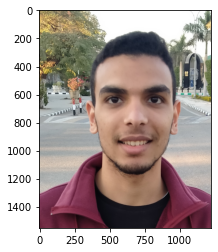

Malek


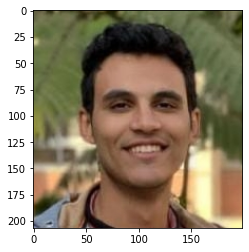

Dodo


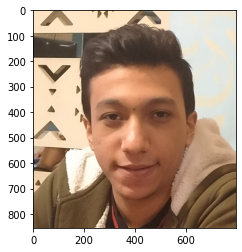

Rammah1


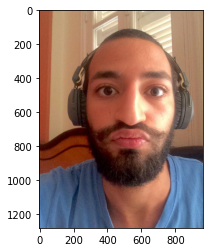

Abdallah


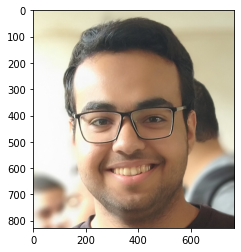

In [18]:
for person in database:
  print(person)
  plt.imshow(database[person])
  plt.show()

**Creating MTCNN detector, using the default weights and making database of detected faces**

In [24]:
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
detected_faces_database = {}

# detect faces in the images
for person in database:
  result = detector.detect_faces(database[person])

  # the result is a list of bounding boxes, where each bounding box defines a lower-lift-corner of bounding box, as well as the width and height
  # extracting the bounding boxes from the result
  x1, y1, width, height = result[0]['box']

  # bug fix (sometimes library return negative values so we take absolute value of cooardinates)
  x1, y1 = abs(x1), abs(y1)
  x2, y2 = x1 + width, y1 + height

  # Extracting the face using these coordinates
  face = database[person]
  face = face[y1:y2, x1:x2]

  # the model expects square input faces with the shape (160, 160)
  image = cv2.resize(face, (160, 160))

  detected_faces_database[person] = image


  

**Figuring out the detected faces**

Ahmed


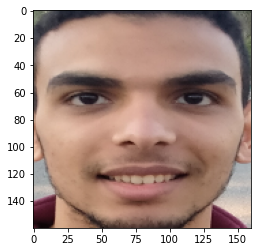

Malek


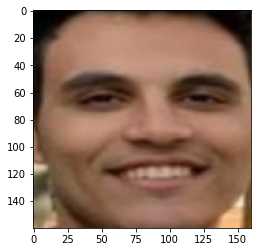

Dodo


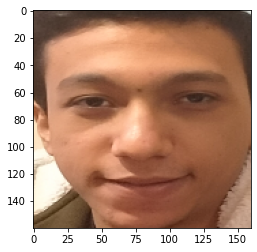

Rammah1


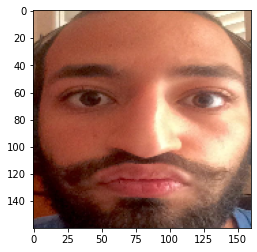

Abdallah


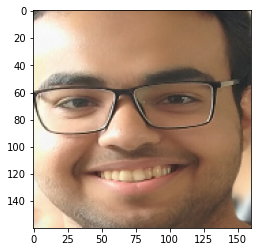

In [25]:
for person in detected_faces_database:
  print(person)
  plt.imshow(detected_faces_database[person])
  plt.show()

In [28]:
import numpy as np

# This specific implementation of the FaceNet model expects that the pixels values are standarized
# standarize pixels values
def standarize_face(face):
  face = face.astype('float32')
  mean, std = face.mean(), face.std()
  face = (face - mean) / std
  
  return face


# in order to make predicitions in Keras, we must expand dimensions so that the face array is one sample
def sample_face(face):
  face_sample = np.expand_dims(face, axis = 0)

  return face_sample


# making prediction and getting embedding
def get_embedding(face):
  embedding = model.predict(face)

  return embedding[0]


# Adding a new person to my database
def add_person(face, name):

  standarized_face = standarize_face(face)
  sampled_face = sample_face(standarized_face)
  embedding = get_embedding(sampled_face)

  return name, embedding


